<a href="https://colab.research.google.com/github/changw121/Best-websites-a-programmer-should-visit/blob/master/pyG%E6%89%B9%E5%A4%84%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# mini-batch
对于图片，只需要通过修改大小，扩充等方法就可以将他们的维度大小和格式统一，但是图呢？图里面有不同的节点和不同的边。

实现并行计算

In [17]:
!pip install torch_geometric
!pip install pyg_lib torch_scatter -f https://data.pyg.org/whl/torch-2.0.0+cu118.html

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 111.7 MB/s eta 0:00:00


In [26]:
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader

dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES', use_node_attr=True)
loader = DataLoader(dataset, batch_size=18, shuffle=True) # 用批次加载器加载一下 batch_size是一批多少张图

In [3]:
dataset

ENZYMES(600)

In [27]:
for batch in loader:
  print(batch)

DataBatch(edge_index=[2, 2694], x=[748, 21], y=[18], batch=[748], ptr=[19])
DataBatch(edge_index=[2, 2668], x=[700, 21], y=[18], batch=[700], ptr=[19])
DataBatch(edge_index=[2, 2558], x=[648, 21], y=[18], batch=[648], ptr=[19])
DataBatch(edge_index=[2, 2656], x=[691, 21], y=[18], batch=[691], ptr=[19])
DataBatch(edge_index=[2, 2212], x=[550, 21], y=[18], batch=[550], ptr=[19])
DataBatch(edge_index=[2, 2182], x=[575, 21], y=[18], batch=[575], ptr=[19])
DataBatch(edge_index=[2, 2092], x=[543, 21], y=[18], batch=[543], ptr=[19])
DataBatch(edge_index=[2, 2066], x=[552, 21], y=[18], batch=[552], ptr=[19])
DataBatch(edge_index=[2, 2238], x=[630, 21], y=[18], batch=[630], ptr=[19])
DataBatch(edge_index=[2, 1962], x=[520, 21], y=[18], batch=[520], ptr=[19])
DataBatch(edge_index=[2, 2502], x=[634, 21], y=[18], batch=[634], ptr=[19])
DataBatch(edge_index=[2, 2440], x=[638, 21], y=[18], batch=[638], ptr=[19])
DataBatch(edge_index=[2, 2668], x=[755, 21], y=[18], batch=[755], ptr=[19])
DataBatch(ed

In [5]:
batch

DataBatch(edge_index=[2, 2660], x=[812, 21], y=[24], batch=[812], ptr=[25])

In [6]:
batch.num_graphs

24

Batch是一个列向量，它将批处理中的每个结点映射到它格子的图：

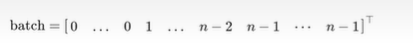
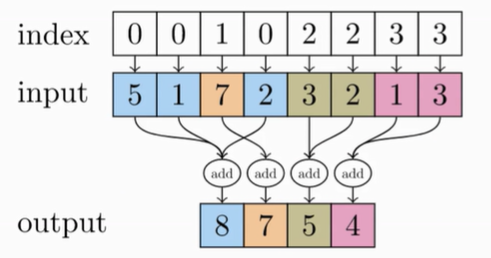

index代表当前这个点属于哪个图，input代表当前这个点具体值，output代表对同一个图中的节点可以做求和、求平均等计算。有几张图output最后就变成了几维.


In [18]:
from torch_scatter import scatter

src = torch.randn(10, 6, 64)
index = torch.tensor([0, 1, 0, 1, 2, 1]) #有三张图

out = scatter(src, index, dim=1, reduce="sum") #聚合函数 dim在维度1上对每张图都求和

print(out.size())

torch.Size([10, 3, 64])


In [28]:
for data in loader:
  print(data)
  #print(data.num_graphs)
  x = scatter(data.x, data.batch, dim=0, reduce='mean') # 输入是data.x即结点，data.batch是32，对应有32张图，dim=0是在结点集上求均值
  print(x.size())
  print('-'*100)

DataBatch(edge_index=[2, 1966], x=[503, 21], y=[18], batch=[503], ptr=[19])
torch.Size([18, 21])
----------------------------------------------------------------------------------------------------
DataBatch(edge_index=[2, 2348], x=[669, 21], y=[18], batch=[669], ptr=[19])
torch.Size([18, 21])
----------------------------------------------------------------------------------------------------
DataBatch(edge_index=[2, 2080], x=[523, 21], y=[18], batch=[523], ptr=[19])
torch.Size([18, 21])
----------------------------------------------------------------------------------------------------
DataBatch(edge_index=[2, 2346], x=[608, 21], y=[18], batch=[608], ptr=[19])
torch.Size([18, 21])
----------------------------------------------------------------------------------------------------
DataBatch(edge_index=[2, 2378], x=[620, 21], y=[18], batch=[620], ptr=[19])
torch.Size([18, 21])
----------------------------------------------------------------------------------------------------
DataBatch(